In [ ]:
# Data Quality and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\kc_house_data.csv')

df.head(5)
#df.shape


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
# Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [71]:
# Missing Data Count
Null_Count = df.isnull().sum()
Null_Count
# Result - No missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
# Checking unique values from each column to find any unwanted values
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [32]:
df['bathrooms'].unique()  

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [42]:
df['zipcode'].unique()  

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [43]:
df['yr_renovated'].unique()  

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [81]:
df['waterfront'].unique()  

array([0, 1])

In [2]:
# Change the name of column date, change the data type to date
df.rename(columns={'date': 'date_sold'}, inplace=True)
df['date_sold'] = pd.to_datetime(df['date_sold'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date_sold      21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [3]:
# Drop id as it doesn't make any difference in prediction
df = df.drop('id', axis=1)

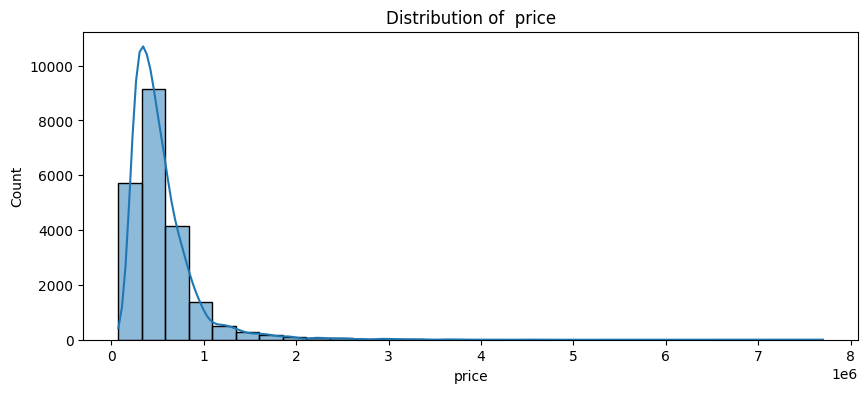

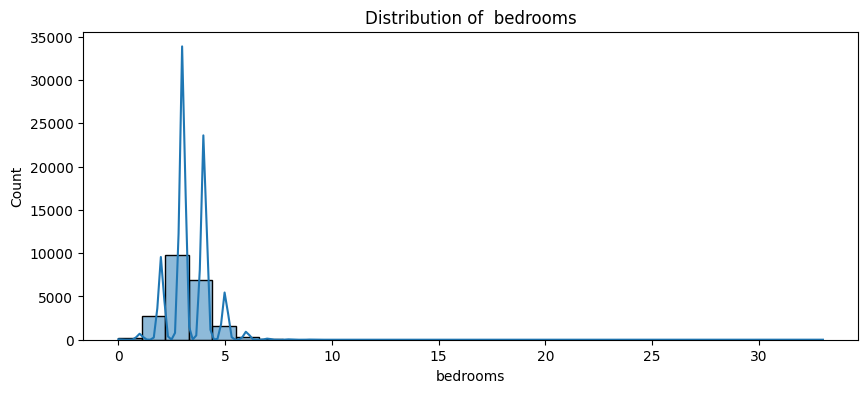

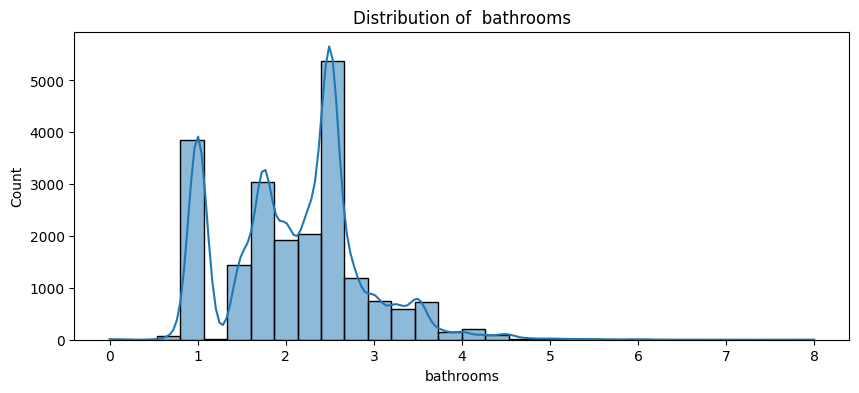

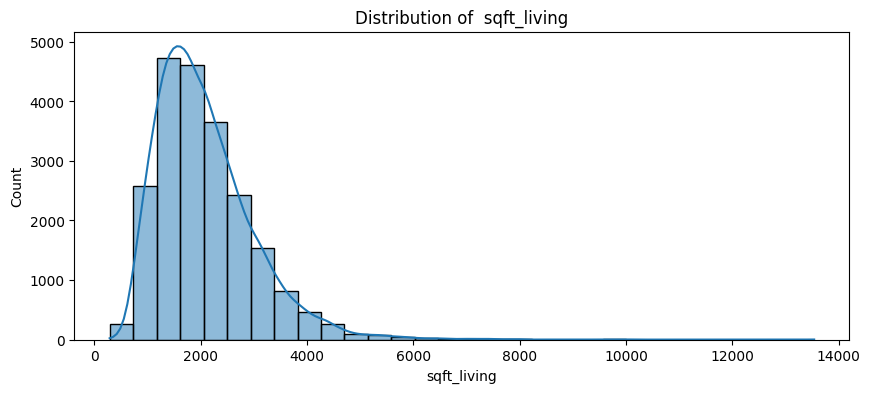

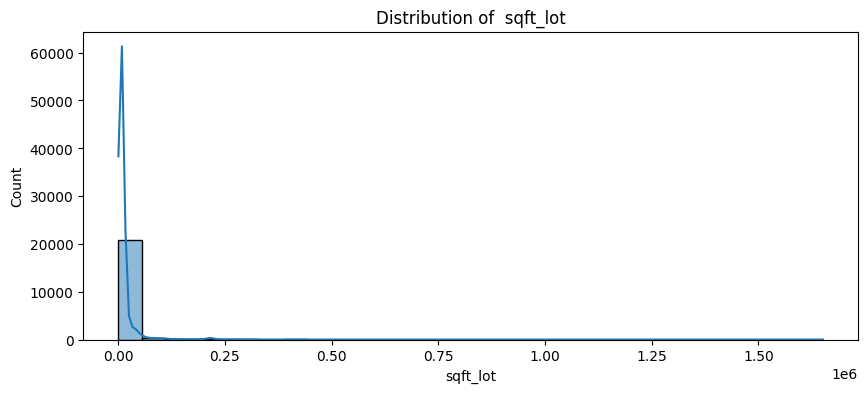

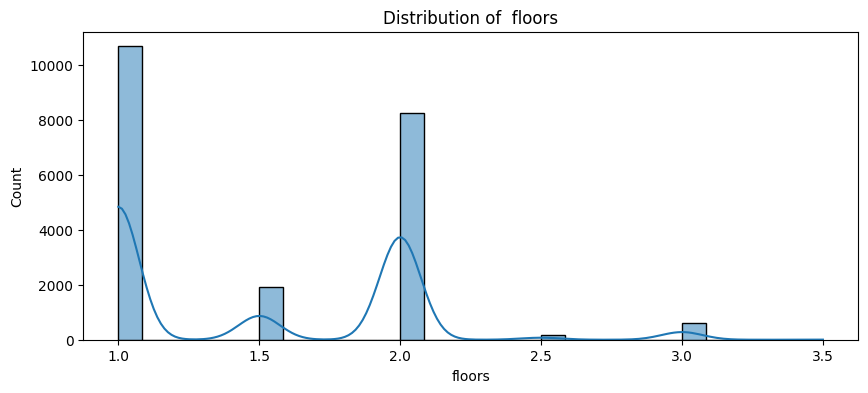

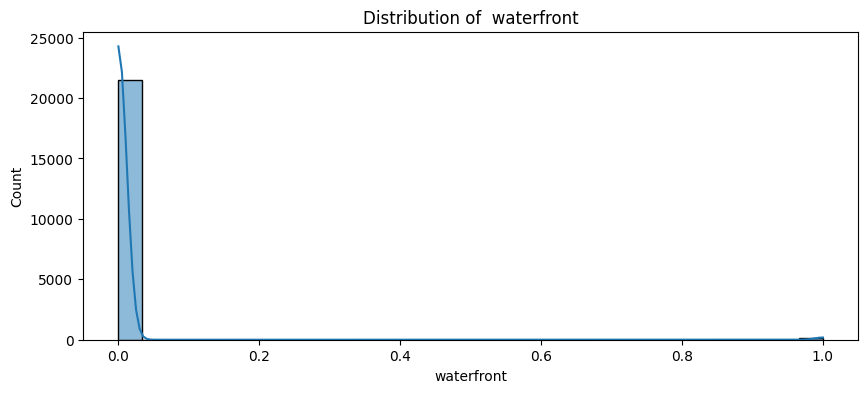

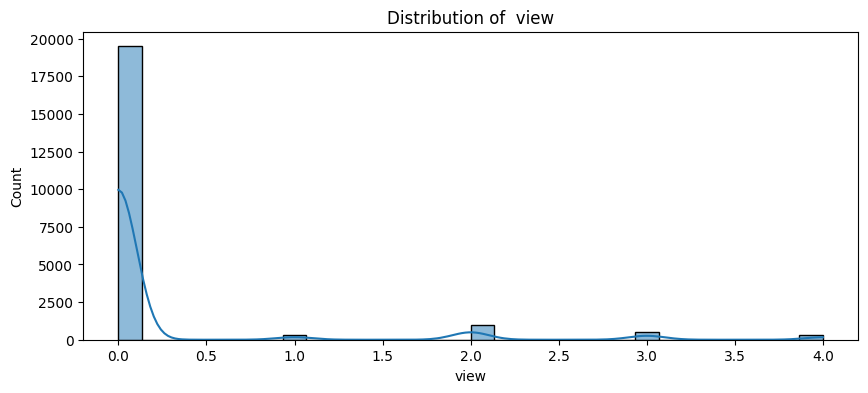

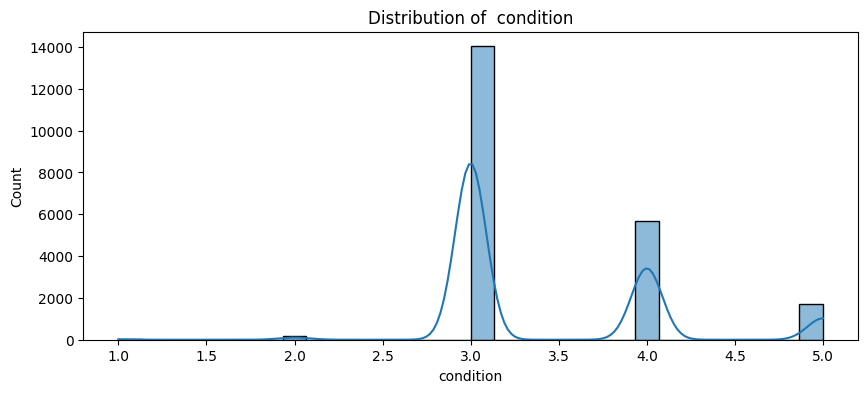

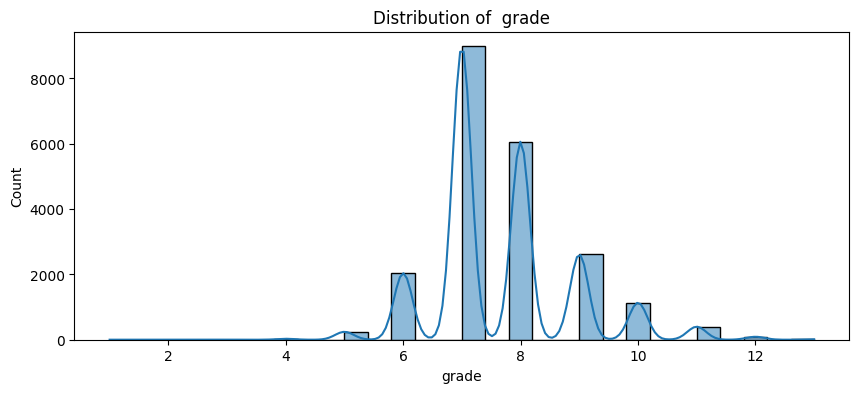

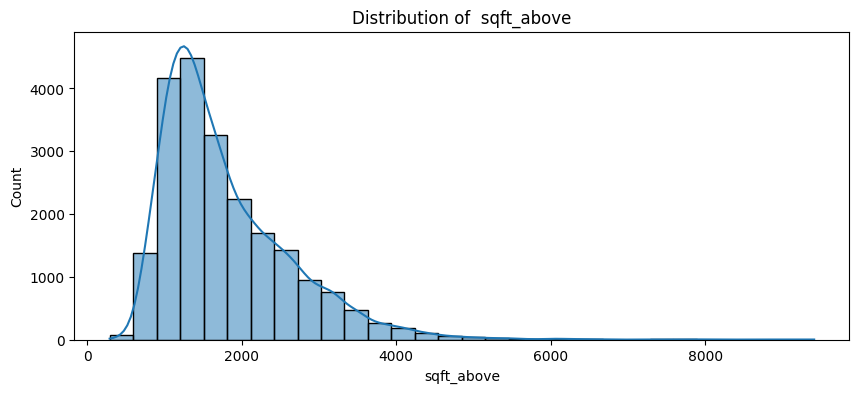

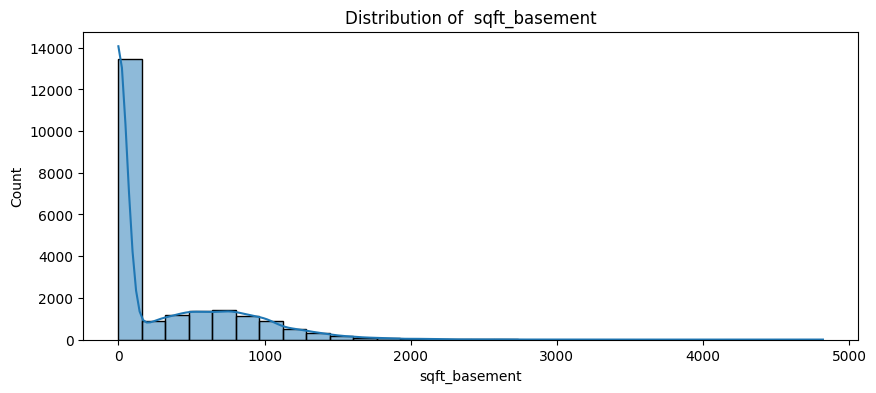

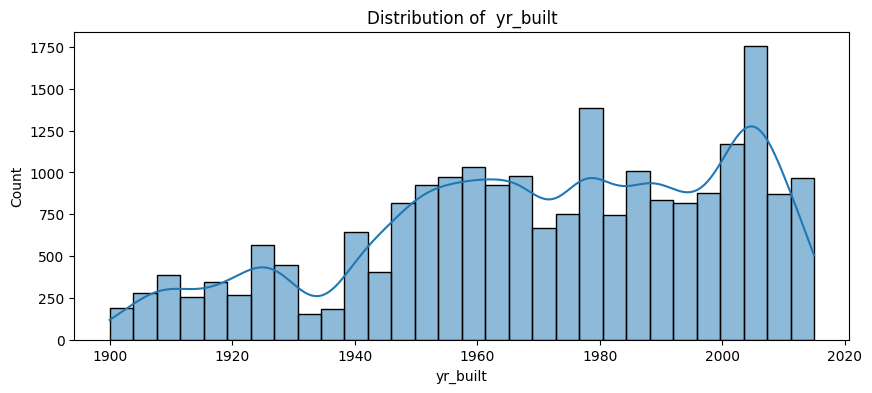

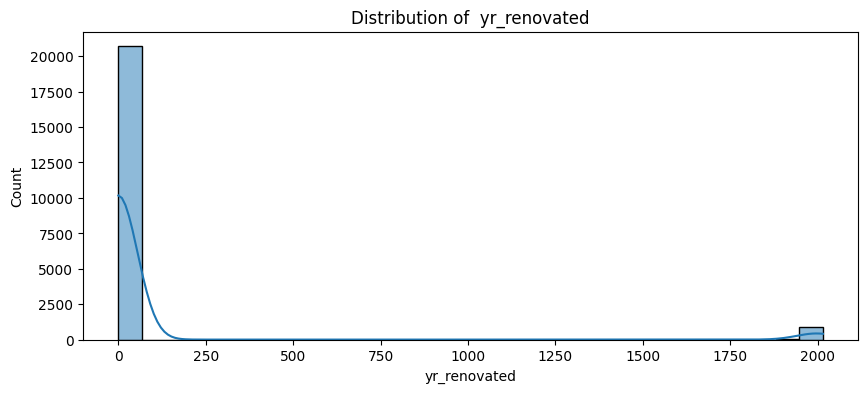

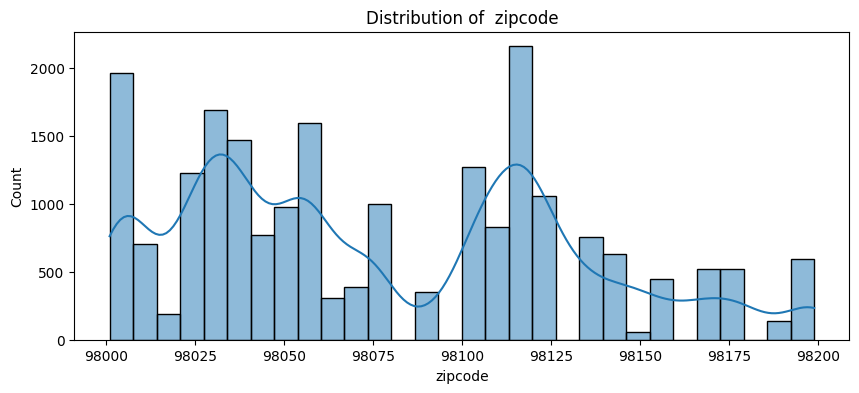

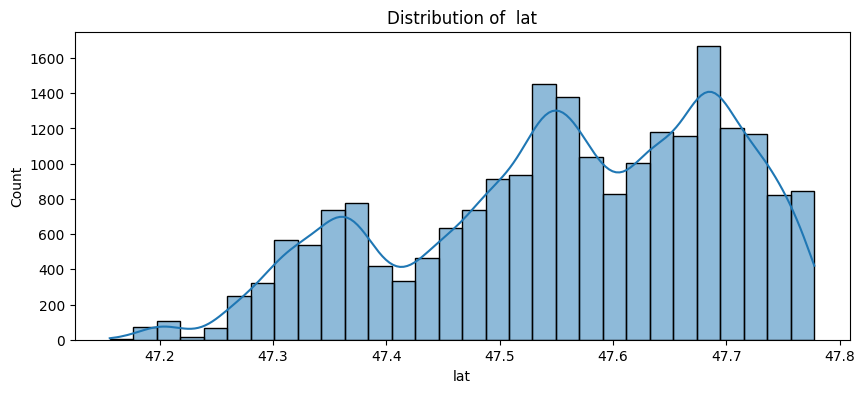

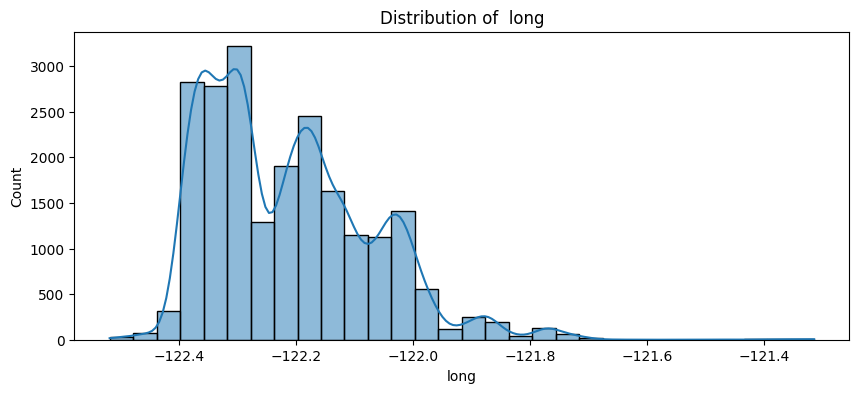

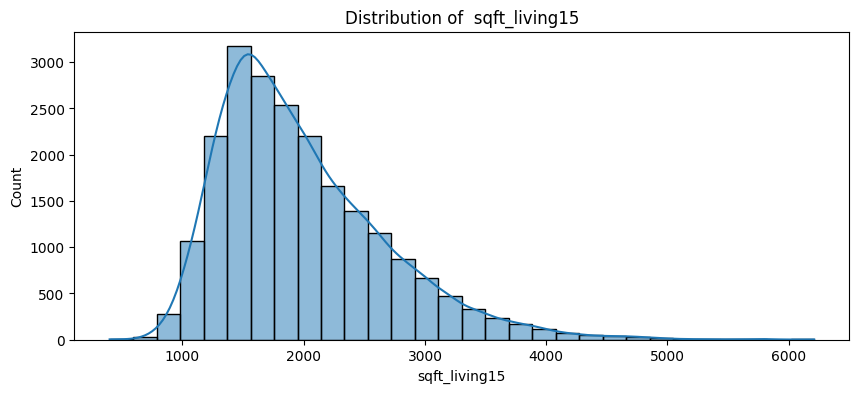

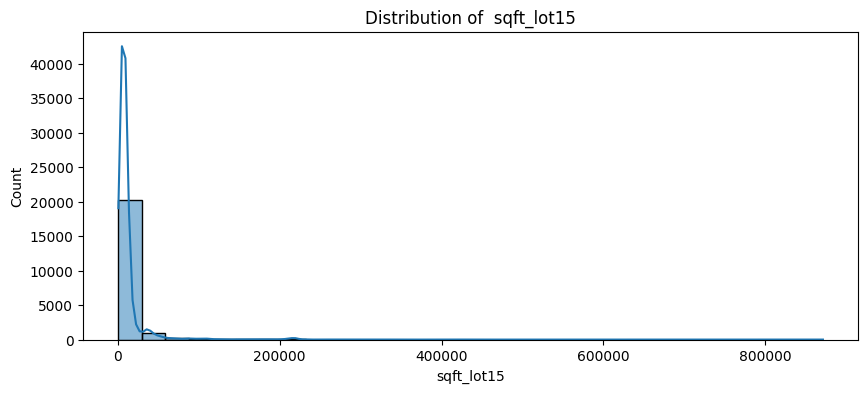

In [84]:
# EDA
# Univariate analysis 1 : Histogram for all the numerical columns- check skewness, check values which can be ignored
# Since id is a unique value - histogram for that doesn't make any sense

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of  {col}")
    plt.show()


In [ ]:
# Findings
# Histogram is right skewed for Sqft_living - we can ignore the sqft living after 4000
# Histogram is right skewed for sqft_above - so sqft_above > 6000 can be ignored
# Histogram is very hight for sqft_basement with 0 value- meaning many houses don't have basement
# histogram is right skewed for sqft_basement - meaning data set has less records for houses having more than 2000 sqft_basement

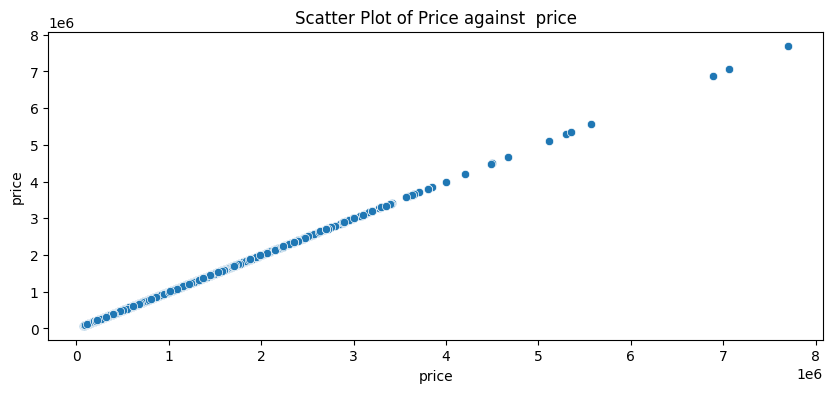

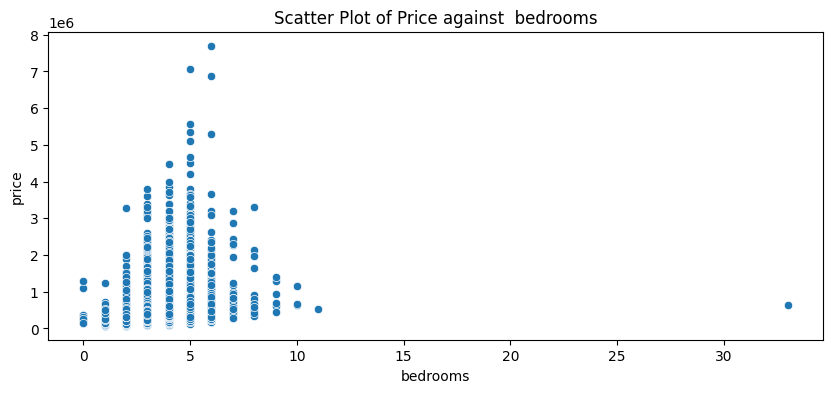

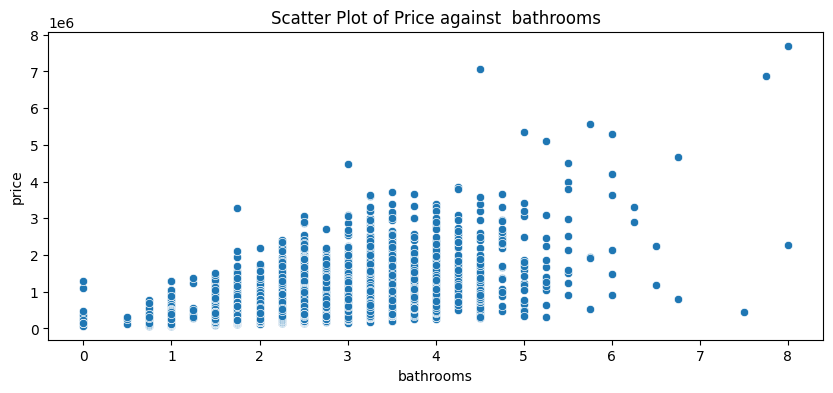

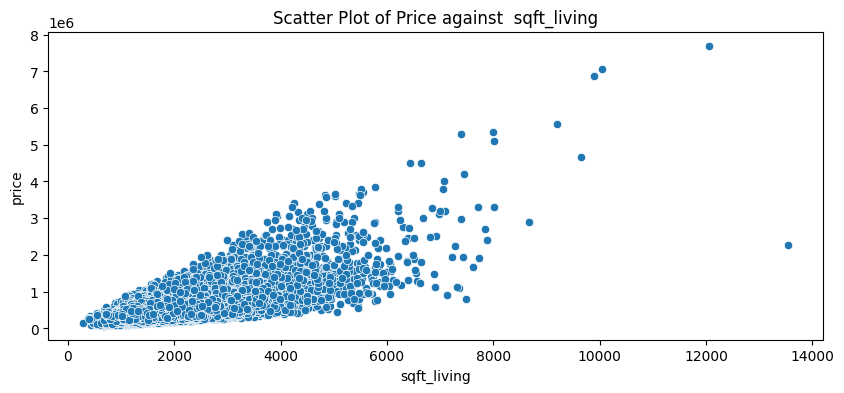

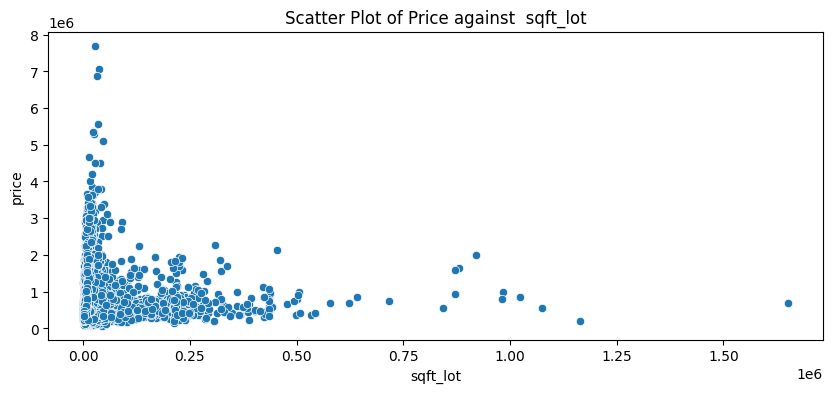

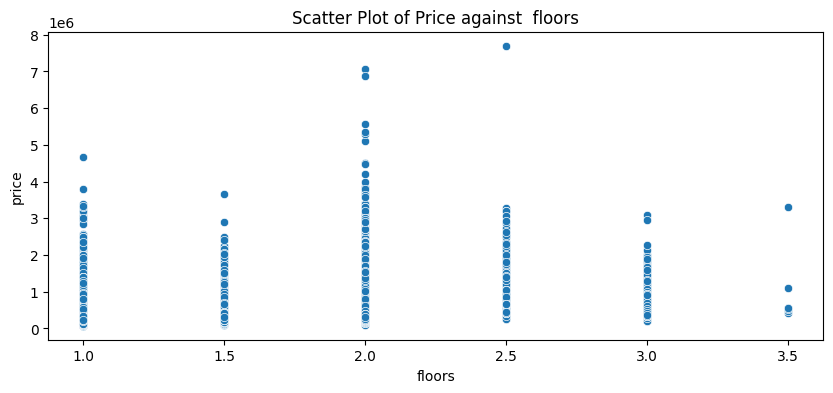

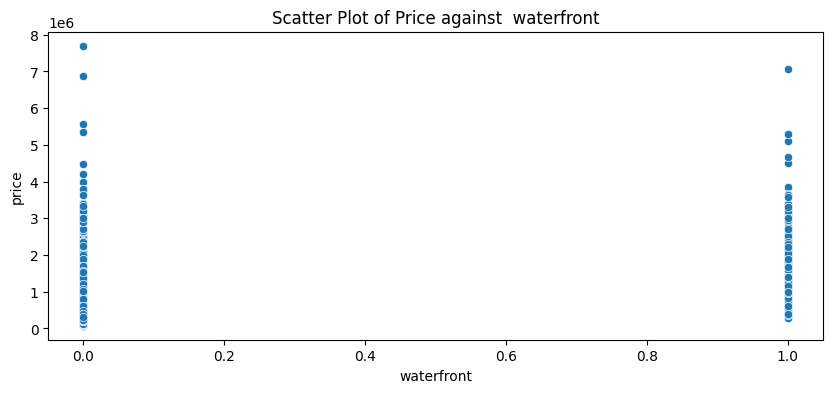

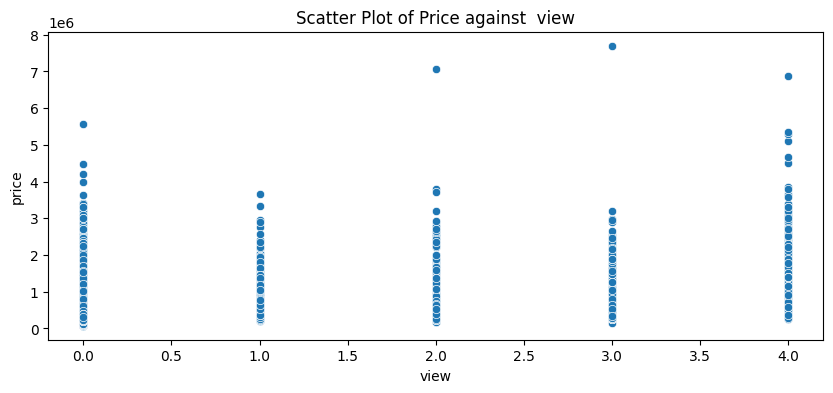

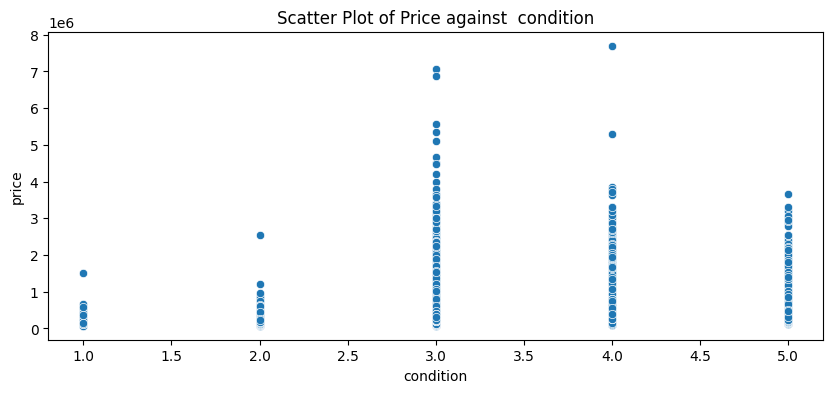

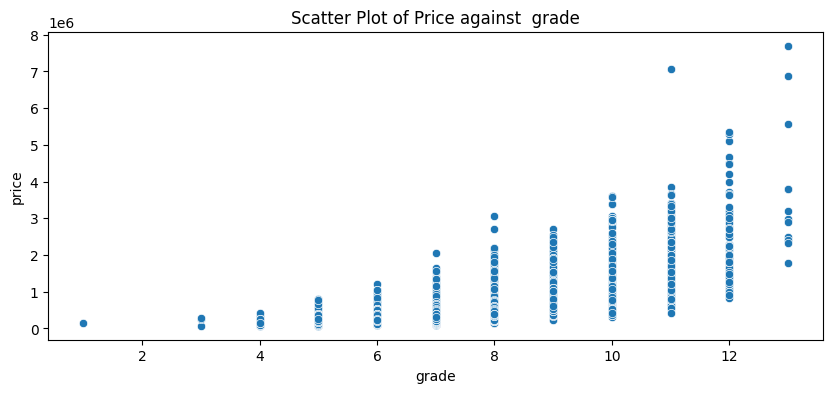

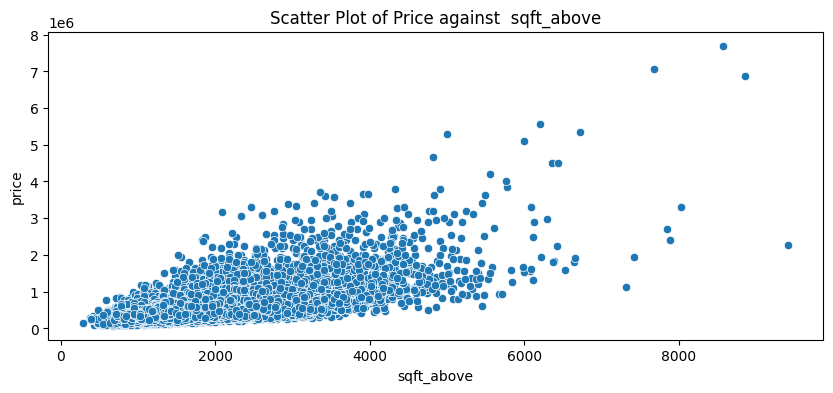

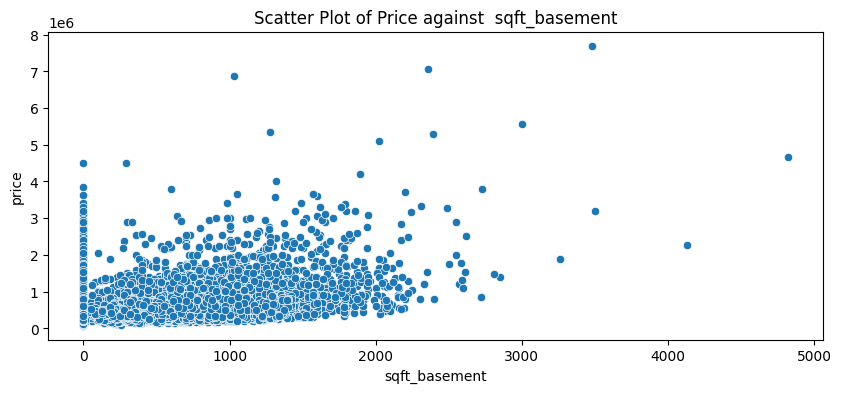

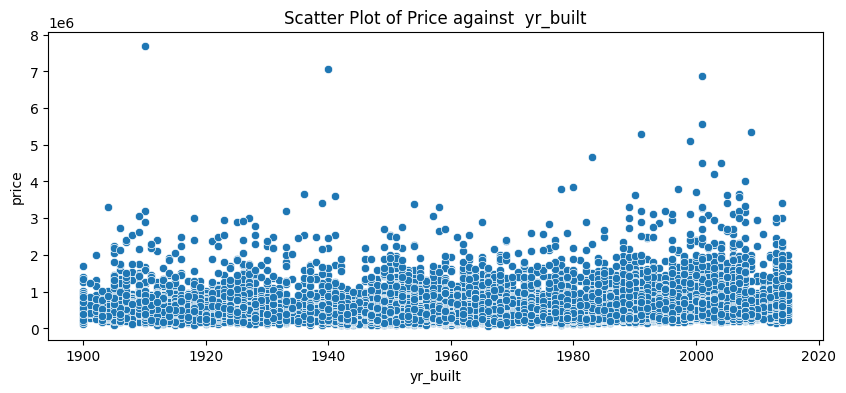

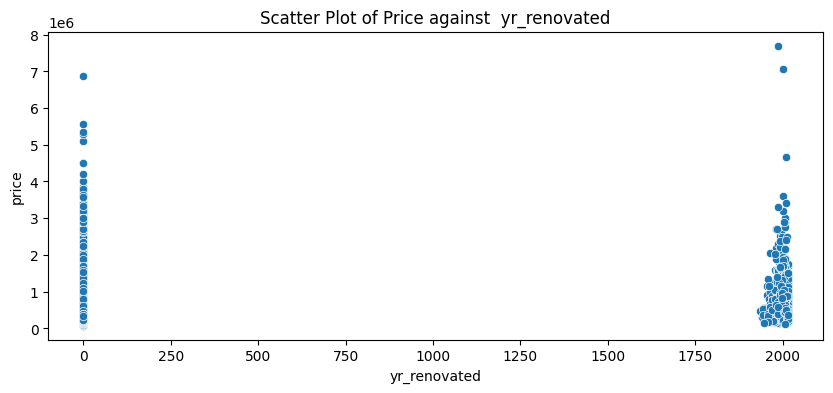

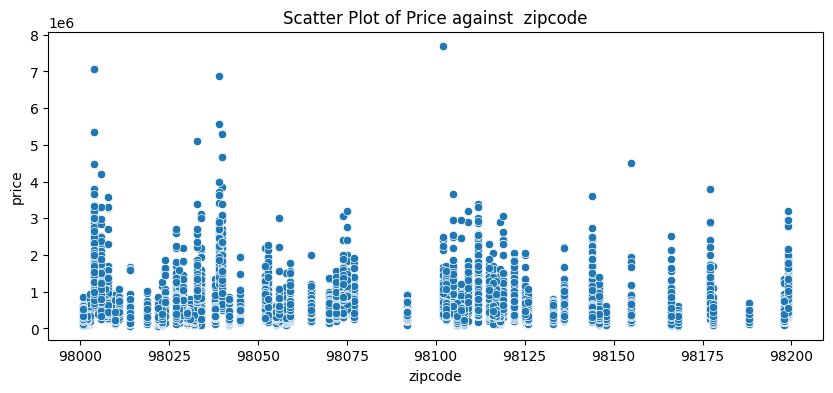

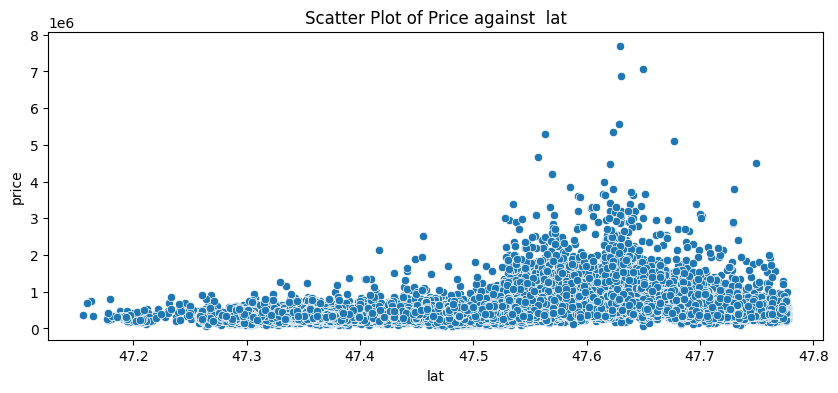

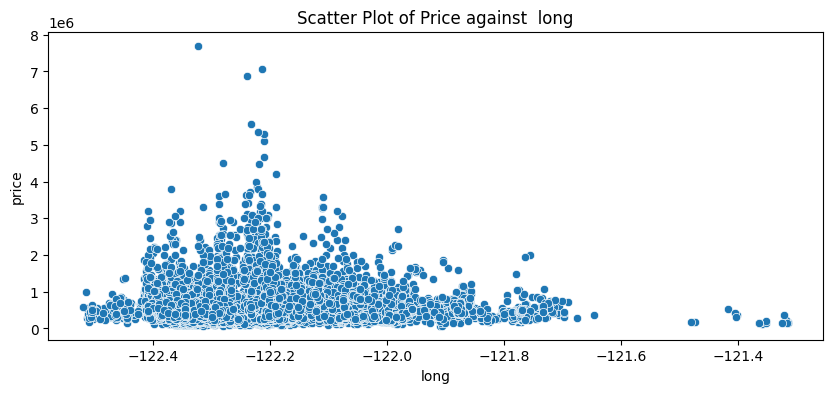

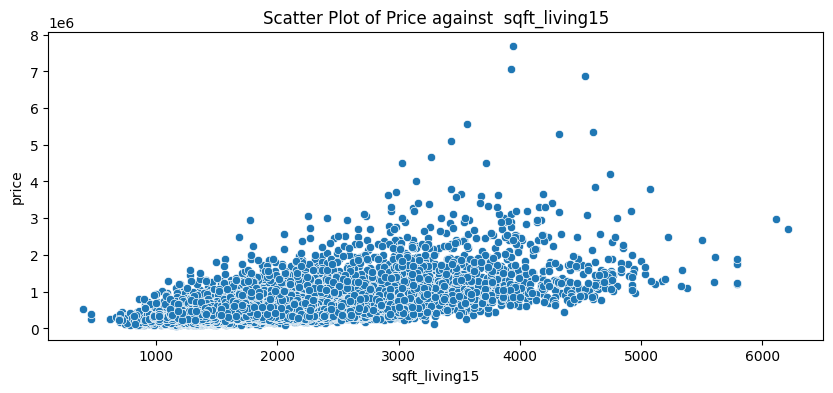

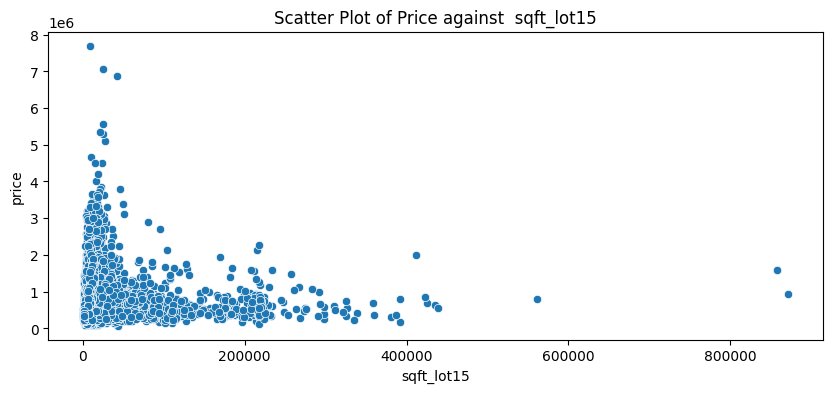

In [85]:
# Biltivariate analysis
# Scatter Plot for Price against each value 

numerical_cols2 = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data=df, x = df[col], y = 'price')
    plt.title(f"Scatter Plot of Price against  {col}")
    plt.show()



In [ ]:
# Analysis 1 : The price increases as number of bedroom increases from 0 to 5 but decreases from 5 to 10
# Analysis 2:  Price increases with increase in bathroom 
# Analysis 3: Price increases with increase in sqft_living
# Analysis 4: Price for all the views are similar - may be view is a candidate column to drop
# Analysis 5: Price increases as grade increases
# Analysis 6: Price increases with sqft_above

In [ ]:
# Multivariate Analysis -For Multivariate Analysis, 1  numerical feature were plotted against 2 categororial features


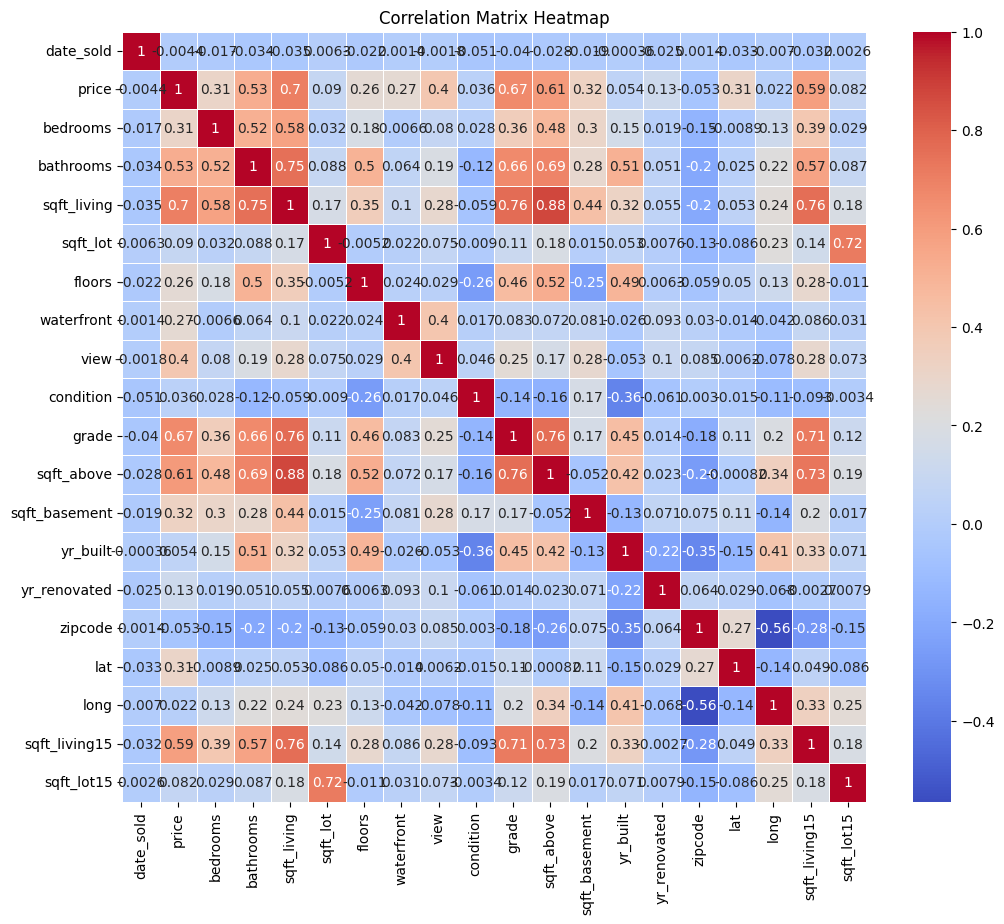

In [4]:
# Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Findings from Correlation Matrix

# 1. sqft_living, sqft_above, and sqft_living15 are highly correlated with each other.
#2. bedrooms, bathrooms, and grade also show strong positive correlations with many other features.
#3. zipcode has low or no correlation with most variables, suggesting it might be better treated as a categorical feature.

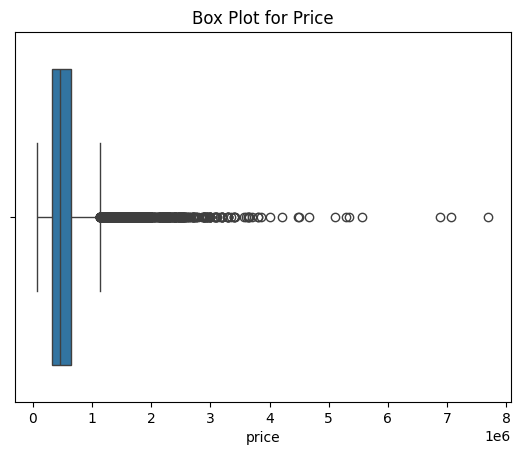

In [6]:
# Finding Outliers

# Using Box plot to see if there are outliers
#plt.figure(figsize(8,4))
sns.boxplot(x=df['price'])
plt.title('Box Plot for Price')
plt.show()

# Clearly there are outliers which needs to be removed

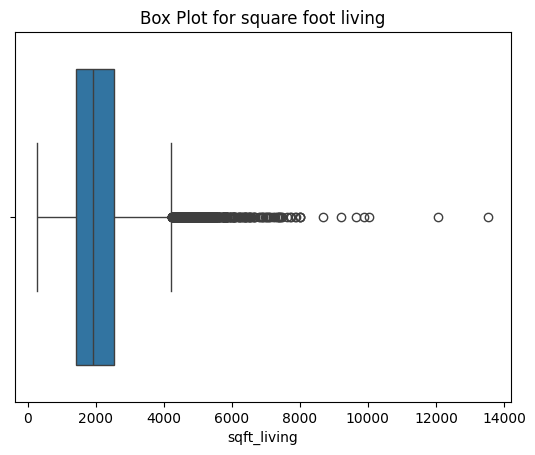

In [9]:
# Box Plot for sqft_living

#plt.figure(figsize(8,4))
sns.boxplot(x=df['sqft_living'])
plt.title('Box Plot for square foot living')
plt.show()

#Clearly there are few outliers above 8000 sqft but those numbers are very less and can be ignored

In [7]:
# Remove Outliers, writing one function to remove lower and upper quartile

def remove_outliers(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:

summary_statistics = df.describe()

numeric_cols = df.select_dtypes(include='number').columns

summary_statistics.loc['median',numeric_cols] = df[numeric_cols].median()
#summary_statistics.loc['mode',numeric_cols] = df[numeric_cols].apply(lambda x: mode(x)[0])
summary_statistics.loc['25%',numeric_cols] = df[numeric_cols].quantile(0.25)
summary_statistics.loc['75%',numeric_cols] = df[numeric_cols].quantile(0.75)


summary_statistics

# Clearly the feature values are not normalized and need normalization, scaling, additional columns might need to be created using logs



,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
median,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000


In [17]:
# Store data in file
df.to_csv('AfterEDA.csv', index=False)


In [ ]:
# Data Preperation

In [ ]:
df = remove_outliers(df,'price')
df.shape